In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
np.set_printoptions(precision=3, suppress=True)

In [2]:
df_train = pd.read_csv('D:/DataSets/95887d6c589011ea/train.csv')
df_train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [3]:
df_test = pd.read_csv('D:/DataSets/95887d6c589011ea/test.csv')
df_test.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [4]:
df_train.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [5]:
df_test.isnull().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          11791
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       31
dtype: int64

In [6]:
df_train = df_train.drop('age', axis=1)

In [7]:
df_train['trainee_engagement_rating'] = df_train['trainee_engagement_rating'].fillna(0)

In [8]:
df_train.isnull().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
is_pass                      0
dtype: int64

In [9]:
df_test = df_test.drop('age', axis=1)

In [10]:
df_test['trainee_engagement_rating'] = df_test['trainee_engagement_rating'].fillna(0)

In [11]:
df_test.isnull().sum()

id                           0
program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  total_programs_enrolled    73147 non-null  int64  
 12  is_handicapped             73147 non-null  object 
 13  trainee_engagement_rating  73147 non-null  flo

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         31349 non-null  object 
 1   program_id                 31349 non-null  object 
 2   program_type               31349 non-null  object 
 3   program_duration           31349 non-null  int64  
 4   test_id                    31349 non-null  int64  
 5   test_type                  31349 non-null  object 
 6   difficulty_level           31349 non-null  object 
 7   trainee_id                 31349 non-null  int64  
 8   gender                     31349 non-null  object 
 9   education                  31349 non-null  object 
 10  city_tier                  31349 non-null  int64  
 11  total_programs_enrolled    31349 non-null  int64  
 12  is_handicapped             31349 non-null  object 
 13  trainee_engagement_rating  31349 non-null  flo

In [14]:
df_train.describe()

,program_duration,test_id,trainee_id,city_tier,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,2.583934,2.393112,0.695408
std,6.889679,51.239048,5703.556093,1.011587,1.240816,1.326867,0.460238
min,117.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,14.000000,5.000000,1.000000


In [15]:
df_test.describe()

,program_duration,test_id,trainee_id,city_tier,total_programs_enrolled,trainee_engagement_rating
count,31349.000000,31349.000000,31349.000000,31349.000000,31349.000000,31349.000000
mean,128.211043,90.607196,9853.374302,2.252289,2.591566,2.400396
std,6.900161,51.174130,5714.103785,1.012264,1.232798,1.332908
min,117.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5042.000000,1.000000,2.000000,1.000000
50%,131.000000,89.000000,9663.000000,2.000000,2.000000,2.000000
75%,134.000000,134.000000,14568.000000,3.000000,3.000000,4.000000
max,136.000000,187.000000,20098.000000,4.000000,14.000000,5.000000


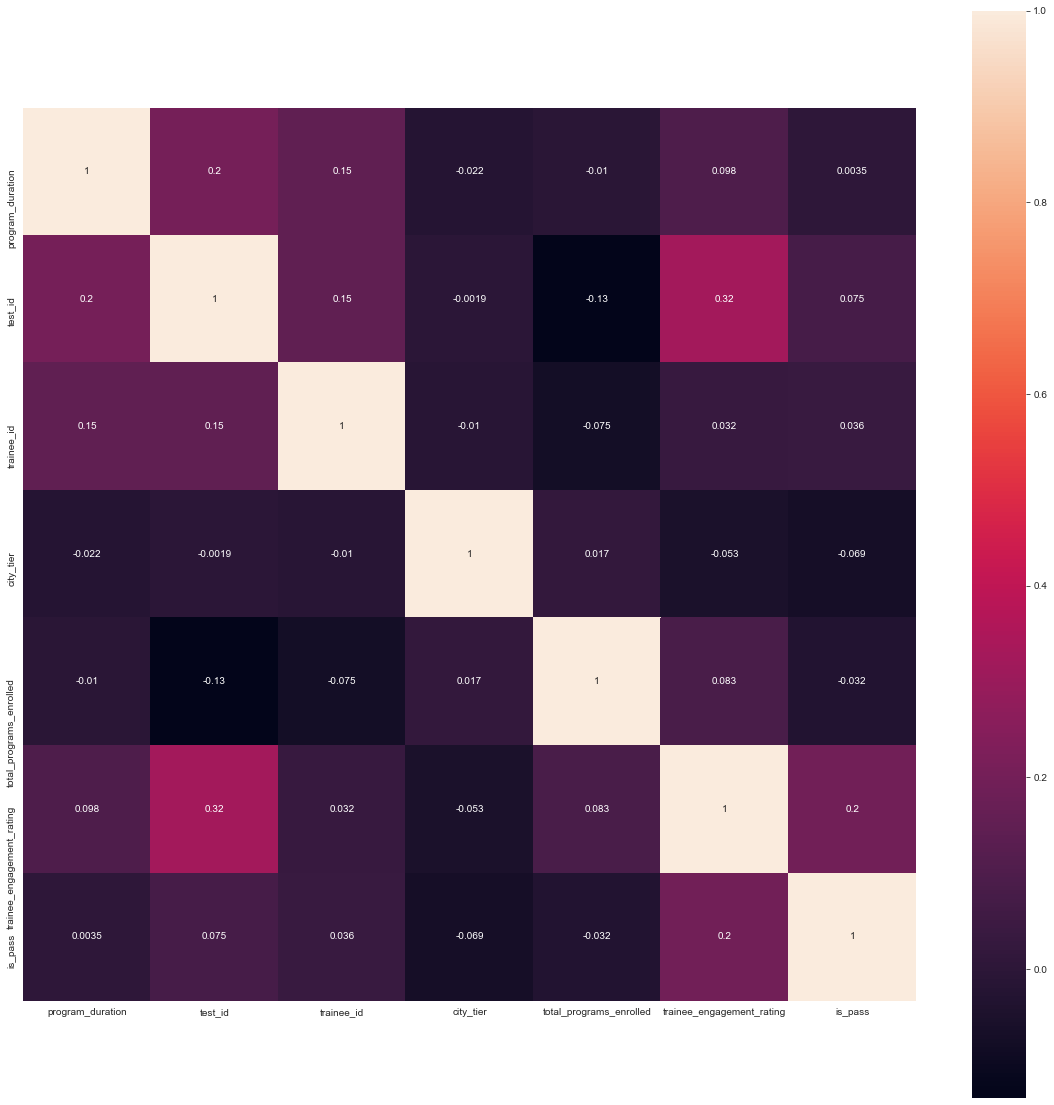

In [16]:
import seaborn as sns
from matplotlib import pyplot

sns.set_style("darkgrid")
pyplot.figure(figsize=(20, 20))
sns.heatmap(df_train.corr(), square=True, annot=True)

In [17]:
df_train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,2,N,4.0,1


In [18]:
df_train.columns

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [19]:
df_train = df_train.drop(['program_id', 'test_id', 'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education', 'is_handicapped'], axis = 1)
df_train.head()

,id,program_type,program_duration,city_tier,total_programs_enrolled,trainee_engagement_rating,is_pass
0,9389_150,Y,136,3,5,1.0,0
1,16523_44,T,131,4,2,3.0,1
2,13987_178,Z,120,1,1,2.0,1
3,13158_32,T,117,3,4,1.0,1
4,10591_84,V,131,1,2,4.0,1


In [20]:
df_train['program_type'].head()

0    Y
1    T
2    Z
3    T
4    V
Name: program_type, dtype: object

In [21]:
types = pd.get_dummies(df_train['program_type'])
types.head()

,S,T,U,V,X,Y,Z
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


In [22]:
types = pd.get_dummies(df_train['program_type'], drop_first = True)
df_train = pd.concat([df_train, types], axis = 1)
df_train.head()

,id,program_type,program_duration,city_tier,total_programs_enrolled,trainee_engagement_rating,is_pass,T,U,V,X,Y,Z
0,9389_150,Y,136,3,5,1.0,0,0,0,0,0,1,0
1,16523_44,T,131,4,2,3.0,1,1,0,0,0,0,0
2,13987_178,Z,120,1,1,2.0,1,0,0,0,0,0,1
3,13158_32,T,117,3,4,1.0,1,1,0,0,0,0,0
4,10591_84,V,131,1,2,4.0,1,0,0,1,0,0,0


In [23]:
df_train.drop(['program_type'], axis = 1, inplace = True)
df_train.head()

,id,program_duration,city_tier,total_programs_enrolled,trainee_engagement_rating,is_pass,T,U,V,X,Y,Z
0,9389_150,136,3,5,1.0,0,0,0,0,0,1,0
1,16523_44,131,4,2,3.0,1,1,0,0,0,0,0
2,13987_178,120,1,1,2.0,1,0,0,0,0,0,1
3,13158_32,117,3,4,1.0,1,1,0,0,0,0,0
4,10591_84,131,1,2,4.0,1,0,0,1,0,0,0


In [24]:
df_train.columns

Index(['id', 'program_duration', 'city_tier', 'total_programs_enrolled',
       'trainee_engagement_rating', 'is_pass', 'T', 'U', 'V', 'X', 'Y', 'Z'],
      dtype='object')

In [25]:
df_train = df_train[['id', 'T', 'U', 'V', 'X', 'Y', 'Z', 'program_duration', 'city_tier', 'total_programs_enrolled', 'trainee_engagement_rating', 'is_pass']]
df_train.head()

,id,T,U,V,X,Y,Z,program_duration,city_tier,total_programs_enrolled,trainee_engagement_rating,is_pass
0,9389_150,0,0,0,0,1,0,136,3,5,1.0,0
1,16523_44,1,0,0,0,0,0,131,4,2,3.0,1
2,13987_178,0,0,0,0,0,1,120,1,1,2.0,1
3,13158_32,1,0,0,0,0,0,117,3,4,1.0,1
4,10591_84,0,0,1,0,0,0,131,1,2,4.0,1


In [26]:
df_train = df_train.drop('id', axis = 1)
df_train.head()

,T,U,V,X,Y,Z,program_duration,city_tier,total_programs_enrolled,trainee_engagement_rating,is_pass
0,0,0,0,0,1,0,136,3,5,1.0,0
1,1,0,0,0,0,0,131,4,2,3.0,1
2,0,0,0,0,0,1,120,1,1,2.0,1
3,1,0,0,0,0,0,117,3,4,1.0,1
4,0,0,1,0,0,0,131,1,2,4.0,1


In [27]:
# Split the data into train and test
train_dataset = df_train.sample(frac=0.8, random_state=0)
test_dataset = df_train.drop(train_dataset.index)

print(df_train.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(73147, 11) (58518, 11) (14629, 11)


,count,mean,std,min,25%,50%,75%,max
T,58518.0,0.252828,0.434637,0.0,0.0,0.0,1.0,1.0
U,58518.0,0.107676,0.309974,0.0,0.0,0.0,0.0,1.0
V,58518.0,0.177210,0.381850,0.0,0.0,0.0,0.0,1.0
X,58518.0,0.045712,0.208863,0.0,0.0,0.0,0.0,1.0
Y,58518.0,0.308367,0.461823,0.0,0.0,0.0,1.0,1.0
Z,58518.0,0.090143,0.286389,0.0,0.0,0.0,0.0,1.0
program_duration,58518.0,128.223521,6.890319,117.0,121.0,131.0,134.0,136.0
city_tier,58518.0,2.244967,1.012958,1.0,1.0,2.0,3.0,4.0
total_programs_enrolled,58518.0,2.585991,1.244684,1.0,2.0,2.0,3.0,14.0
trainee_engagement_rating,58518.0,2.396955,1.327669,0.0,1.0,2.0,4.0,5.0


In [38]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('trainee_engagement_rating')
test_labels = test_features.pop('trainee_engagement_rating')

In [39]:
feature = 'program_duration'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

# Normalization
single_feature_normalizer = preprocessing.Normalization()

# adapt to the data
single_feature_normalizer.adapt(single_feature)

(58518,) (58518, 10)


In [55]:
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[  0.253   0.108   0.177   0.046   0.308   0.09  128.224   2.245   2.586
   0.696]


In [40]:
# Sequential model
single_feature_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(units=1) # Linear Model
])

In [41]:
single_feature_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [42]:
# loss and optimizer
loss = keras.losses.MeanAbsoluteError() # MeanSquaredError
optim = keras.optimizers.Adam(lr=0.1)

single_feature_model.compile(optimizer=optim, loss=loss)

In [43]:
history = single_feature_model.fit(
    train_features[feature], train_labels,
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
1463/1463 [==============================] - 5s 2ms/step - loss: 1.1596 - val_loss: 1.1114
Epoch 2/100
1463/1463 [==============================] - 3s 2ms/step - loss: 1.1141 - val_loss: 1.1118
Epoch 3/100
1463/1463 [==============================] - 2s 2ms/step - loss: 1.1132 - val_loss: 1.1118
Epoch 4/100
1463/1463 [==============================] - 2s 2ms/step - loss: 1.1153 - val_loss: 1.1012
Epoch 5/100
1463/1463 [==============================] - 2s 2ms/step - loss: 1.1121 - val_loss: 1.1283
Epoch 6/100
1463/1463 [==============================] - 2s 2ms/step - loss: 1.1154 - val_loss: 1.1021
Epoch 7/100
1463/1463 [==============================] - 2s 2ms/step - loss: 1.1157 - val_loss: 1.1214
Epoch 8/100
1463/1463 [==============================] - 2s 2ms/step - loss: 1.1166 - val_loss: 1.1048
Epoch 9/100
1463/1463 [==============================] - 3s 2ms/step - loss: 1.1144 - val_loss: 1.1166
Epoch 10/100
1463/1463 [==============================] - 3s 2ms/step - l

In [45]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels, verbose=1)

458/458 [==============================] - 1s 1ms/step - loss: 1.1030


1.1029924154281616

In [48]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('trainee_engagement_rating')
    plt.legend()

In [50]:
# DNN
dnn_model = keras.Sequential([
    single_feature_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [51]:
dnn_model.compile(loss=loss, 
                  optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [52]:
dnn_model.fit(
    train_features[feature], train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
1463/1463 [==============================] - 5s 2ms/step - loss: 1.2197 - val_loss: 1.0113
Epoch 2/100
1463/1463 [==============================] - 2s 2ms/step - loss: 1.0091 - val_loss: 1.0011
Epoch 3/100
1463/1463 [==============================] - 2s 2ms/step - loss: 1.0040 - val_loss: 0.9966
Epoch 4/100
1463/1463 [==============================] - 3s 2ms/step - loss: 1.0010 - val_loss: 0.9907
Epoch 5/100
1463/1463 [==============================] - 2s 2ms/step - loss: 0.9933 - val_loss: 1.0042
Epoch 6/100
1463/1463 [==============================] - 3s 2ms/step - loss: 0.9813 - val_loss: 0.9867
Epoch 7/100
1463/1463 [==============================] - 2s 2ms/step - loss: 0.9721 - val_loss: 0.9669
Epoch 8/100
1463/1463 [==============================] - 3s 2ms/step - loss: 0.9686 - val_loss: 0.9615
Epoch 9/100
1463/1463 [==============================] - 3s 2ms/step - loss: 0.9510 - val_loss: 0.9718
Epoch 10/100
1463/1463 [==============================] - 4s 3ms/step - l

In [53]:
dnn_model.evaluate(test_features[feature], test_labels, verbose=1)

458/458 [==============================] - 1s 2ms/step - loss: 0.9314


0.9313880205154419

In [56]:
# multiple inputs
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=loss)

In [57]:
linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
1463/1463 [==============================] - 4s 2ms/step - loss: 0.8903 - val_loss: 0.8011
Epoch 2/100
1463/1463 [==============================] - 3s 2ms/step - loss: 0.8245 - val_loss: 0.8201
Epoch 3/100
1463/1463 [==============================] - 3s 2ms/step - loss: 0.8140 - val_loss: 0.8310
Epoch 4/100
1463/1463 [==============================] - 3s 2ms/step - loss: 0.8134 - val_loss: 0.8078
Epoch 5/100
1463/1463 [==============================] - 2s 2ms/step - loss: 0.8151 - val_loss: 0.7972
Epoch 6/100
1463/1463 [==============================] - 3s 2ms/step - loss: 0.8067 - val_loss: 0.9090
Epoch 7/100
1463/1463 [==============================] - 2s 1ms/step - loss: 0.8181 - val_loss: 0.8144
Epoch 8/100
1463/1463 [==============================] - 3s 2ms/step - loss: 0.8232 - val_loss: 0.8330
Epoch 9/100
1463/1463 [==============================] - 3s 2ms/step - loss: 0.8193 - val_loss: 0.8159
Epoch 10/100
1463/1463 [==============================] - 2s 2ms/step - l

In [58]:
linear_model.evaluate(
    test_features, test_labels, verbose=1)

458/458 [==============================] - 1s 2ms/step - loss: 0.8297


0.8297471404075623

In [77]:
predict = linear_model.predict(test_features)
predict

array([[0.591],
       [1.623],
       [3.466],
       ...,
       [3.701],
       [3.135],
       [3.414]], dtype=float32)

In [81]:
submit = pd.read_csv('D:/DataSets/95887d6c589011ea/Sample Submission.csv')
submit['is_pass'] = predict
submit.to_csv('D:/DataSets/95887d6c589011ea/Submission/submission.csv', index=False)